In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [137]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn import base
from sklearn import calibration
from sklearn import cluster
from sklearn import compose
from sklearn import covariance
from sklearn import cross_decomposition
from sklearn import datasets
from sklearn import decomposition
from sklearn import discriminant_analysis
from sklearn import dummy
from sklearn import ensemble
from sklearn import exceptions
from sklearn import experimental
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import gaussian_process
from sklearn import impute
from sklearn import inspection
from sklearn import isotonic
from sklearn import kernel_approximation
from sklearn import kernel_ridge
from sklearn import linear_model
from sklearn import manifold
from sklearn import metrics
from sklearn import mixture
from sklearn import model_selection
from sklearn import multiclass
from sklearn import multioutput
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import neural_network
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import random_projection
from sklearn import semi_supervised
from sklearn import svm
from sklearn import tree
from sklearn import utils

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [138]:
df = pd.read_csv('BankMarketingDataSet.csv', sep=';')
df

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,admin.,married,basic.6y,no,yes,yes,1.4,93.918,-42.7,4.958,5228.1,no
4115,4116,39,admin.,married,high.school,no,yes,no,1.4,93.918,-42.7,4.959,5228.1,no
4116,4117,27,student,single,high.school,no,no,no,-1.8,92.893,-46.2,1.354,5099.1,no
4117,4118,58,admin.,married,high.school,no,no,no,1.4,93.444,-36.1,4.966,5228.1,no


In [139]:
print(df.shape[0])

4119


In [140]:
print(df.isnull().sum())

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [141]:
print(df['y'].value_counts())

y
no     3668
yes     451
Name: count, dtype: int64


<Axes: xlabel='age'>

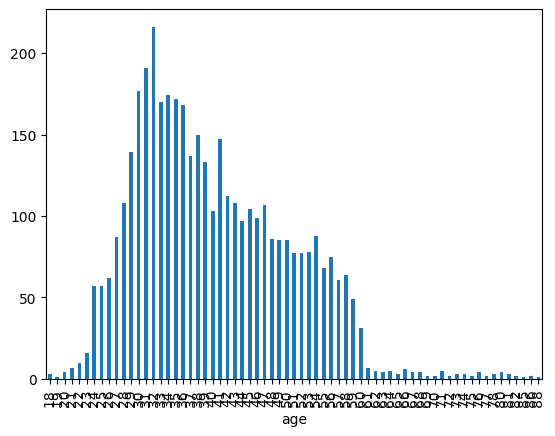

In [142]:
df['age'].value_counts().sort_index().plot(kind='bar')

In [143]:
cross = pd.crosstab(df['marital'], df['y'], normalize='index')
print(cross)

y               no       yes
marital                     
divorced  0.903587  0.096413
married   0.899562  0.100438
single    0.865568  0.134432
unknown   0.909091  0.090909


Influenza, ma in modo moderato, in quanto i single hanno il 13%, mentre gli altri stati si aggirano sul 10%

<Axes: xlabel='marital'>

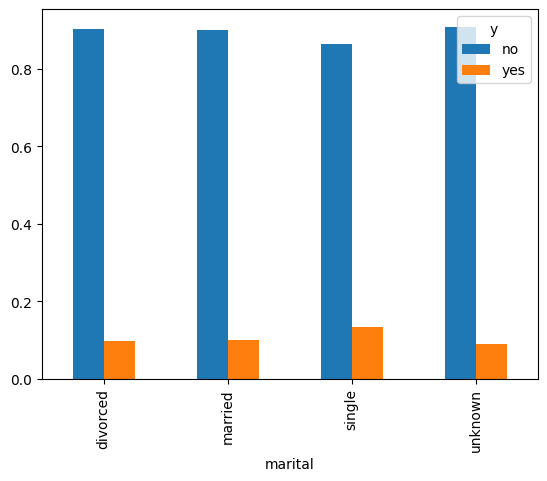

In [144]:
cross.plot(kind = 'bar')

In [145]:
agecross = pd.crosstab(df['age'], df['y'], normalize='index')
agecross *100

y,no,yes
age,,
18,66.666667,33.333333
19,100.000000,0.000000
20,100.000000,0.000000
21,57.142857,42.857143
22,80.000000,20.000000
...,...,...
81,33.333333,66.666667
82,0.000000,100.000000
85,100.000000,0.000000


In [146]:
age_yes = agecross['yes']
age_no = agecross['no']

<Axes: xlabel='age'>

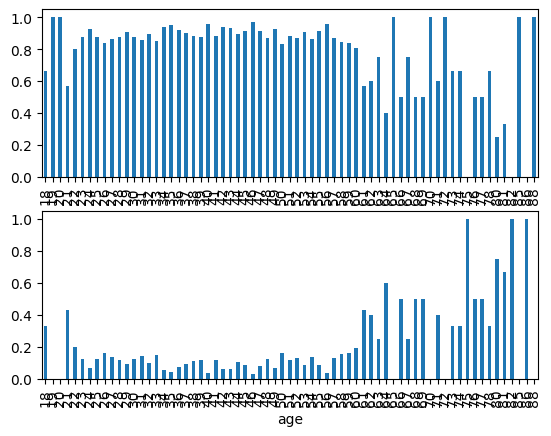

In [147]:
plt.subplot(2, 1, 1)
age_no.plot(kind = 'bar')
plt.subplot(2, 1, 2)
age_yes.plot(kind = 'bar')

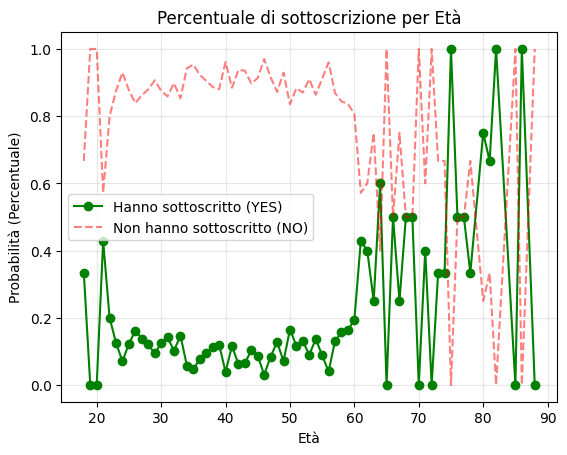

In [148]:
plt.plot(age_yes.index, age_yes.values, color='green', marker='o', label='Hanno sottoscritto (YES)')
plt.plot(age_no.index, age_no.values, color='red', linestyle='--', alpha=0.5, label='Non hanno sottoscritto (NO)')
plt.title('Percentuale di sottoscrizione per Età')
plt.xlabel('Età')
plt.ylabel('Probabilità (Percentuale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Dal grafico posso dire che si ha una tendenza al si per i più giovani (25 anni), e a partire dai 60 anni.
Inoltre dato che il grafico varia molto posso vedere che sono presenti pochi campioni per le età più avanzate nel mio dataset.
La fascia centrale (30-50) invece ha una bassa probabilità di accettare

In [149]:
df[df['age']>60]['y'].value_counts()

,count
y,
no,44
yes,35


# 2 Predizione

In [150]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [151]:
df

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,admin.,married,basic.6y,no,yes,yes,1.4,93.918,-42.7,4.958,5228.1,no
4115,4116,39,admin.,married,high.school,no,yes,no,1.4,93.918,-42.7,4.959,5228.1,no
4116,4117,27,student,single,high.school,no,no,no,-1.8,92.893,-46.2,1.354,5099.1,no
4117,4118,58,admin.,married,high.school,no,no,no,1.4,93.444,-36.1,4.966,5228.1,no


In [152]:
cat_cols =[]
for col in df.columns:
  if df[col].dtype == 'object':
    cat_cols.append(col)

print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']


In [153]:

mapping = {
    'yes' :1,
    'no' :0
}
df_pred = df.copy()
yesno = ['default', 'housing', 'loan', 'y']
for col in yesno:
  df_pred[col] = df_pred[col].map(mapping)
  cat_cols.remove(col)



In [154]:
print(cat_cols)

['job', 'marital', 'education']


In [155]:
df_pred.replace('unknown', np.nan, inplace=True)
df_pred = df_pred.dropna()

In [156]:
le = LabelEncoder()
for col in cat_cols:
  df_pred[col] = le.fit_transform(df_pred[col])
df_pred

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,1,1,2,0.0,1.0,0.0,-1.8,92.893,-46.2,1.313,5099.1,0
1,2,39,7,2,3,0.0,0.0,0.0,1.1,93.994,-36.4,4.855,5191.0,0
2,3,25,7,1,3,0.0,1.0,0.0,1.4,94.465,-41.8,4.962,5228.1,0
4,5,47,0,1,6,0.0,1.0,0.0,-0.1,93.200,-42.0,4.191,5195.8,0
5,6,32,7,2,6,0.0,0.0,0.0,-1.1,94.199,-37.5,0.884,4963.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,0,1,1,0.0,1.0,1.0,1.4,93.918,-42.7,4.958,5228.1,0
4115,4116,39,0,1,3,0.0,1.0,0.0,1.4,93.918,-42.7,4.959,5228.1,0
4116,4117,27,8,2,3,0.0,0.0,0.0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,4118,58,0,1,3,0.0,0.0,0.0,1.4,93.444,-36.1,4.966,5228.1,0


In [157]:
X =df_pred.drop('y', axis=1)
y=df_pred['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [158]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
acc_dt_train = accuracy_score(y_pred, y_train)
print(f'Accuacy di train : {acc_dt_train}')
print(confusion_matrix(y_pred, y_train))

y_pred = dt.predict(X_test)
acc_dt_test = accuracy_score(y_test, y_pred)
print(f'Accuacy di test : {acc_dt_test}')
print(confusion_matrix(y_pred, y_test))


Accuacy di train : 1.0
[[2040    0]
 [   0  277]]
Accuacy di test : 0.8137128072445019
[[609  73]
 [ 71  20]]


Un accuracy di 0.81 è buona, ma il train ha 1, qunid è presente overfitting

In [159]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
acc_lr_train = accuracy_score(y_pred, y_train)
print(f'Accuacy di train : {acc_lr_train}')
print(confusion_matrix(y_pred, y_train))

y_pred = lr.predict(X_test)
acc_lr_test = accuracy_score(y_test, y_pred)
print(f'Accuacy di test : {acc_lr_test}')
print(confusion_matrix(y_pred, y_test))


Accuacy di train : 0.8765645230902028
[[2013  259]
 [  27   18]]
Accuacy di test : 0.8796895213454075
[[673  86]
 [  7   7]]


I risultati sono migliori. Non presente overfitting, ma dalla confusion matrix possiamo vedere che il modello tende sempre a dare no come risposta, e dato che il dataset è molto squilibrato i risultati sono buoni.

In [160]:
import warnings
warnings.filterwarnings('ignore')
score = cross_val_score(dt, X, y, cv = 10)
print(f'Per il dt con fold:  {score}, {score.mean()}, {score.var()}')
score = cross_val_score(lr, X, y, cv = 10)
print(f'Per il lr con fold:  {score}, {score.mean()}, {score.var()}')


Per il dt con fold:  [0.7605178  0.81553398 0.8381877  0.81553398 0.81553398 0.76375405
 0.7961165  0.46278317 0.83495146 0.84466019], 0.7747572815533981, 0.011562928750222554
Per il lr con fold:  [0.8802589  0.87055016 0.88349515 0.87702265 0.88349515 0.86731392
 0.8802589  0.8802589  0.88673139 0.87702265], 0.8786407766990291, 3.194352803175507e-05


Ovviamente è più affidabile il kfold. Possiamo infatti vedere che nel dt c'è molta varianza, che dimostra l'overfitting presente nel modello.
Ne emerge vincitore il lr, con una media di 0.87

In [161]:
numeric = df.copy()

numeric_cols = []
for col in df.columns:
  if df[col].dtype in ['int64', 'float64'] :
    numeric_cols.append(col)

print(numeric_cols)

numeric

['id', 'age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,admin.,married,basic.6y,no,yes,yes,1.4,93.918,-42.7,4.958,5228.1,no
4115,4116,39,admin.,married,high.school,no,yes,no,1.4,93.918,-42.7,4.959,5228.1,no
4116,4117,27,student,single,high.school,no,no,no,-1.8,92.893,-46.2,1.354,5099.1,no
4117,4118,58,admin.,married,high.school,no,no,no,1.4,93.444,-36.1,4.966,5228.1,no


In [162]:
for col in df.columns:
  if col not in numeric_cols:
    numeric.drop(col, axis=1, inplace = True)
numeric

,id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,30,-1.8,92.893,-46.2,1.313,5099.1
1,2,39,1.1,93.994,-36.4,4.855,5191.0
2,3,25,1.4,94.465,-41.8,4.962,5228.1
3,4,38,1.4,94.465,-41.8,4.959,5228.1
4,5,47,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...
4114,4115,30,1.4,93.918,-42.7,4.958,5228.1
4115,4116,39,1.4,93.918,-42.7,4.959,5228.1
4116,4117,27,-1.8,92.893,-46.2,1.354,5099.1
4117,4118,58,1.4,93.444,-36.1,4.966,5228.1


In [163]:
gemnumeric = df.select_dtypes(include='number').copy()


In [164]:
X = numeric.copy()
y = df['y'].map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [165]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
acc_dt_train = accuracy_score(y_pred, y_train)
print(f'Accuacy di train : {acc_dt_train}')
print(confusion_matrix(y_pred, y_train))

y_pred = dt.predict(X_test)
acc_dt_test = accuracy_score(y_test, y_pred)
print(f'Accuacy di test : {acc_dt_test}')
print(confusion_matrix(y_pred, y_test))


Accuacy di train : 1.0
[[2751    0]
 [   0  338]]
Accuacy di test : 0.841747572815534
[[836  82]
 [ 81  31]]


In [166]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
acc_lr_train = accuracy_score(y_pred, y_train)
print(f'Accuacy di train : {acc_lr_train}')
print(confusion_matrix(y_pred, y_train))

y_pred = lr.predict(X_test)
acc_lr_test = accuracy_score(y_test, y_pred)
print(f'Accuacy di test : {acc_lr_test}')
print(confusion_matrix(y_pred, y_test))


Accuacy di train : 0.8915506636451926
[[2730  314]
 [  21   24]]
Accuacy di test : 0.8844660194174757
[[907 109]
 [ 10   4]]


In [167]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = [c for c in categorical_cols if c != 'y']
dummies = pd.get_dummies(df[categorical_cols], dtype=int)
new_df = pd.concat([numeric, dummies], axis =1)
new_df

,id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,1,30,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
1,2,39,1.1,93.994,-36.4,4.855,5191.0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,3,25,1.4,94.465,-41.8,4.962,5228.1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,4,38,1.4,94.465,-41.8,4.959,5228.1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,5,47,-0.1,93.200,-42.0,4.191,5195.8,1,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,1.4,93.918,-42.7,4.958,5228.1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4115,4116,39,1.4,93.918,-42.7,4.959,5228.1,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4116,4117,27,-1.8,92.893,-46.2,1.354,5099.1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4117,4118,58,1.4,93.444,-36.1,4.966,5228.1,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [168]:
X = new_df.copy()
y = df['y'].map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [171]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
acc_new_dt_train = accuracy_score(y_pred, y_train)
print(f'Accuacy di train : {acc_new_dt_train}')
print(confusion_matrix(y_pred, y_train))

y_pred = dt.predict(X_test)
acc_new_dt_test = accuracy_score(y_test, y_pred)

print(f'Accuacy di test : {acc_new_dt_test}')
print(f'Prima era: {acc_dt_test}')

print(confusion_matrix(y_pred, y_test))


Accuacy di train : 1.0
[[2751    0]
 [   0  338]]
Accuacy di test : 0.8349514563106796
Prima era: 0.841747572815534
[[834  87]
 [ 83  26]]


In [170]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
acc_new_lr_train = accuracy_score(y_pred, y_train)
print(f'Accuacy di train : {acc_new_lr_train}')
print(confusion_matrix(y_pred, y_train))

y_pred = lr.predict(X_test)
acc_new_lr_test = accuracy_score(y_test, y_pred)
print(f'Accuacy di test : {acc_new_lr_test}')
print(f'Prima era: {acc_lr_test}')
print(confusion_matrix(y_pred, y_test))


Accuacy di train : 0.894464227905471
[[2721  296]
 [  30   42]]
Accuacy di test : 0.8844660194174757
Prima era: 0.8844660194174757
[[904 106]
 [ 13   7]]


In [174]:
df_pred

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,1,1,2,0.0,1.0,0.0,-1.8,92.893,-46.2,1.313,5099.1,0
1,2,39,7,2,3,0.0,0.0,0.0,1.1,93.994,-36.4,4.855,5191.0,0
2,3,25,7,1,3,0.0,1.0,0.0,1.4,94.465,-41.8,4.962,5228.1,0
4,5,47,0,1,6,0.0,1.0,0.0,-0.1,93.200,-42.0,4.191,5195.8,0
5,6,32,7,2,6,0.0,0.0,0.0,-1.1,94.199,-37.5,0.884,4963.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4115,30,0,1,1,0.0,1.0,1.0,1.4,93.918,-42.7,4.958,5228.1,0
4115,4116,39,0,1,3,0.0,1.0,0.0,1.4,93.918,-42.7,4.959,5228.1,0
4116,4117,27,8,2,3,0.0,0.0,0.0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,4118,58,0,1,3,0.0,0.0,0.0,1.4,93.444,-36.1,4.966,5228.1,0


In [177]:
X = df_pred.drop(['y'], axis = 1)
y = df_pred['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

lin = LinearRegression()
lin.fit (X_train, y_train)
y_pred = np.round(lin.predict(X_train))

acc_lin_train = accuracy_score(y_pred, y_train)
print(f'Accuracy di train: {acc_lin_train}')


y_pred = np.round(lin.predict(X_test))

acc_lin_test = accuracy_score(y_pred, y_test)
print(f'Accuracy di train: {acc_lin_test}')


Accuracy di train: 0.8800172637030643
Accuracy di train: 0.8771021992238034
